In [1]:
import tensorflow as tf
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Constants:

IM_SIZE = 150  # as in original data
BATCH = 32
TRAIN_PATH = 'seg_train'
TEST_PATH = 'seg_test'

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset='training',
    image_size=(IM_SIZE, IM_SIZE),
    seed=100,
    batch_size=BATCH
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [5]:
val_data = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset='validation',
    image_size=(IM_SIZE, IM_SIZE),
    seed=100,
    batch_size=BATCH
)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [6]:
test_data = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    image_size=(IM_SIZE, IM_SIZE),
    seed=100,
    batch_size=BATCH
)

Found 3000 files belonging to 6 classes.


In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
import matplotlib.pyplot as plt

In [9]:
cls_names = train_data.class_names

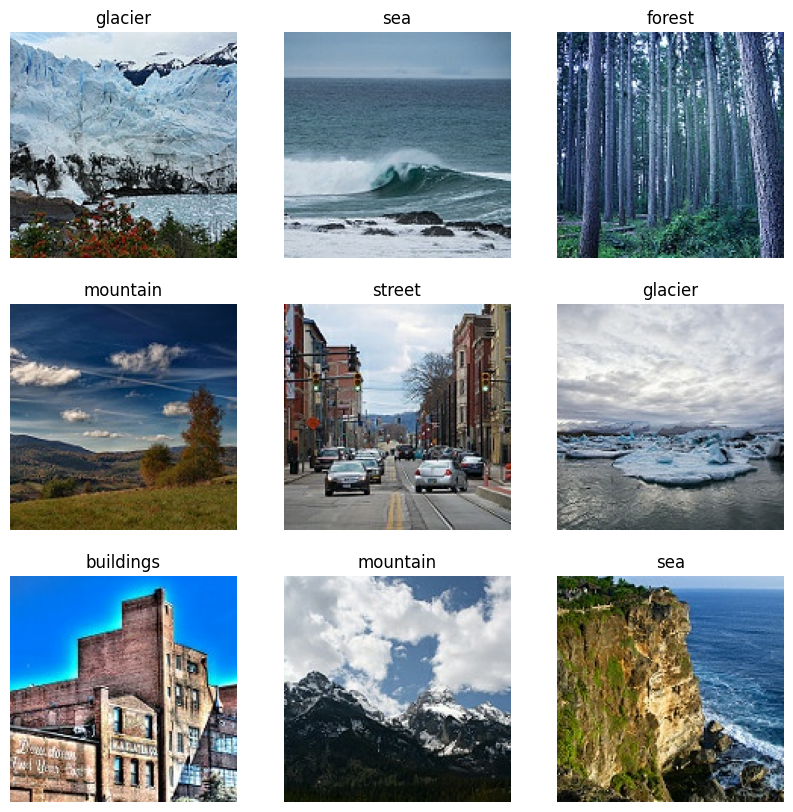

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(cls_names[labels[i]])
    plt.axis("off")

In [11]:
np.array(list(train_data.take(1))[0][0][0]).max()

255.0

In [12]:
for image_batch, labels_batch in train_data:
  print(f'Batch shape for image: {image_batch.shape}')
  print(f'Batch shape for label: {labels_batch.shape}')
  break

Batch shape for image: (32, 150, 150, 3)
Batch shape for label: (32,)


In [13]:
train_dataset = train_data.cache().prefetch(tf.data.AUTOTUNE)
val_dataset = val_data.cache().prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.cache().prefetch(tf.data.AUTOTUNE)

<img src='https://media1.tenor.com/m/HPFCfPmhsZYAAAAd/omar12345-open-wide.gif'>